In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
meter=pd.read_csv('https://dev-smartutils.techolution.com/smartmeter/data/downloadMainsMeterHistory?fromTime=2020-03-01T18:30:00.209Z&toTime=2020-05-26T12:34:16.191Z&groupByTime=1h')

In [3]:
meter=meter.dropna()
meter=meter.loc[meter['Key']=='Mains Total Energy']
meter=meter.drop(['Key','Unit','Phase2','Phase3'],axis=1)
meter['Energy_Consumption']=meter['Phase1']-meter['Phase1'].shift(1)
meter=meter.fillna(0)
meter=meter.drop(['Phase1'],axis=1)
meter['Date']=pd.to_datetime(meter['Date'])

In [4]:
meter

,Date,Time,Energy_Consumption
219,2020-03-03,12:00:00,0.00
225,2020-03-03,13:00:00,13.18
231,2020-03-03,14:00:00,9.91
237,2020-03-03,15:00:00,10.49
243,2020-03-03,16:00:00,10.65
...,...,...,...
11709,2020-05-22,07:00:00,1.91
11715,2020-05-22,08:00:00,2.32
11721,2020-05-22,09:00:00,3.47
11727,2020-05-22,10:00:00,8.46


In [5]:
meter.dtypes

Date                  datetime64[ns]
Time                          object
Energy_Consumption           float64
dtype: object

In [6]:
meter=meter.groupby('Date')['Energy_Consumption'].sum()
meter=pd.DataFrame(meter)
meter.head()

,Energy_Consumption
Date,
2020-03-03,119.70
2020-03-04,203.33
2020-03-05,200.40
2020-03-06,230.53
2020-03-07,224.76


In [7]:
meter['Energy_Consumption'].min()

16.920000000000073

In [8]:
meter.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
      

In [9]:
pd.date_range(start = '2020-03-03', end = '2020-05-22' ).difference(meter.index)

DatetimeIndex(['2020-04-05', '2020-04-12'], dtype='datetime64[ns]', freq=None)

In [10]:
idx = pd.date_range('2020-03-03', '2020-05-21')

In [11]:
meter = meter.reindex(idx, fill_value=16.92)

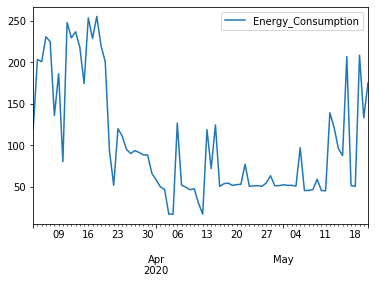

In [12]:
meter.plot()

In [13]:
meter['Seasonal First Difference']=meter['Energy_Consumption']-meter['Energy_Consumption'].shift(1)

In [14]:
meter.shape

(80, 2)

In [15]:
meter.dtypes

Energy_Consumption           float64
Seasonal First Difference    float64
dtype: object

In [16]:
meter.index

DatetimeIndex(['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
      

In [17]:
#meter.index = pd.DatetimeIndex(meter.index).to_period('D')

In [18]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(meter['Energy_Consumption'],order=(0, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

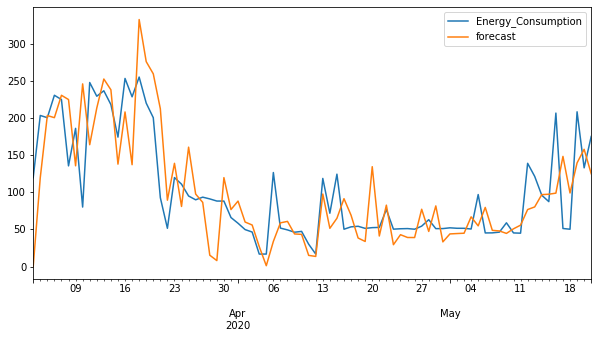

In [19]:
meter['forecast']=results.predict(start=0,end=79,dynamic=False)
meter[['Energy_Consumption','forecast']].plot(figsize=(10,5))

In [20]:
from pandas.tseries.offsets import DateOffset
future_dates=[meter.index[-1]+ DateOffset(days=x)for x in range(0,12)]

In [21]:
future_dates

[Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-06-01 00:00:00')]

In [22]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=meter.columns)

In [23]:
meter

,Energy_Consumption,Seasonal First Difference,forecast
2020-03-03,119.70,NaN,0.000000
2020-03-04,203.33,83.63,119.644573
2020-03-05,200.40,-2.93,203.252595
2020-03-06,230.53,30.13,200.402639
2020-03-07,224.76,-5.77,230.502134
...,...,...,...
2020-05-17,51.32,-155.23,148.298681
2020-05-18,50.34,-0.98,99.102345
2020-05-19,208.29,157.95,139.562019
2020-05-20,132.89,-75.40,157.825136


In [24]:
future_dates_df

,Energy_Consumption,Seasonal First Difference,forecast
2020-05-22,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN
2020-05-27,NaN,NaN,NaN
2020-05-28,NaN,NaN,NaN
2020-05-29,NaN,NaN,NaN
2020-05-30,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN


In [25]:
future=pd.concat([meter,future_dates_df])
#future[:77]

In [26]:
future[77:]

,Energy_Consumption,Seasonal First Difference,forecast
2020-05-19,208.29,157.95,139.562019
2020-05-20,132.89,-75.40,157.825136
2020-05-21,175.10,42.21,125.000011
2020-05-22,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN
2020-05-27,NaN,NaN,NaN
2020-05-28,NaN,NaN,NaN


In [27]:
#future.index = pd.DatetimeIndex(future.index).to_period('D')

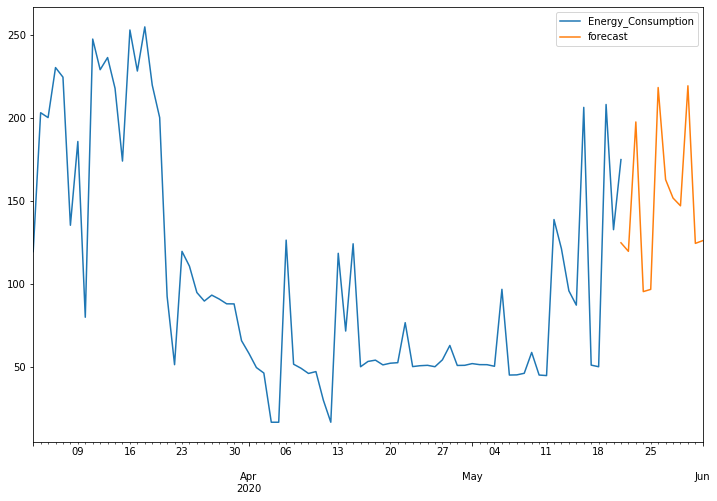

In [28]:
future['forecast'] = results.predict(start = 79, end = 97 ,dynamic= True)  
future[['Energy_Consumption', 'forecast']].plot(figsize=(12, 8))

In [29]:
future[72:]

,Energy_Consumption,Seasonal First Difference,forecast
2020-05-14,96.06,-25.34,NaN
2020-05-15,87.45,-8.61,NaN
2020-05-16,206.55,119.10,NaN
2020-05-17,51.32,-155.23,NaN
2020-05-18,50.34,-0.98,NaN
2020-05-19,208.29,157.95,NaN
2020-05-20,132.89,-75.40,NaN
2020-05-21,175.10,42.21,125.000011
2020-05-22,NaN,NaN,119.851647
2020-05-23,NaN,NaN,197.771178
